In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.font_manager as fm

In [2]:
from configs.db_config import get_db_engine

In [47]:
# matplotilb 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시 마이너스 깨짐 방지
# print(plt.style.available)
plt.style.use('seaborn-v0_8-white')
sns.set_theme(style="whitegrid")

# 시스템에 설치된 폰트 목록 확인
font_list = [font.name for font in fm.fontManager.ttflist]
print([f for f in font_list if 'gul' in f.lower() or '고딕' in f or 'gothic' in f.lower()])


['Copperplate Gothic Bold', 'Century Gothic', 'Century Gothic', 'Copperplate Gothic Light', 'Gulim', 'Franklin Gothic Demi', 'Malgun Gothic', 'Yu Gothic', 'Franklin Gothic Book', 'Malgun Gothic', 'MS Gothic', 'Yu Gothic', 'Franklin Gothic Demi Cond', 'Century Gothic', 'Malgun Gothic', 'Hancom Gothic', 'Franklin Gothic Heavy', 'Franklin Gothic Medium', 'HYGothic-Extra', 'Yu Gothic', 'Franklin Gothic Demi', 'Hancom Gothic', 'Franklin Gothic Medium', 'Yu Gothic', 'Franklin Gothic Book', 'New Gulim', 'Franklin Gothic Medium Cond', 'Showcard Gothic', 'Century Gothic', 'HYGothic-Medium', 'Franklin Gothic Heavy']


In [6]:
# 결과 저장 폴더 생성
RESULT_DIR = '../analsys_results'
os.makedirs(RESULT_DIR, exist_ok=True)

In [8]:
# 데이터 베이스에서 데이터 불러오기
engine = get_db_engine()

In [9]:
# 테이블 목록 불러오기
tables_query = """
SELECT table_name 
FROM information_schema.tables 
WHERE table_schema='public'
ORDER BY table_name;
"""
tables = pd.read_sql_query(tables_query, engine)
print("데이터베이스 테이블 목록:")
display(tables)

데이터베이스 테이블 목록:


,table_name
0,age_based_costs
1,diseases
2,hospital_based_costs
3,hospital_types
4,raw_medical_data
5,region_based_costs
6,regions


In [10]:
## 4. 각 테이블 데이터 로드
# 질병명 테이블
disease_df = pd.read_sql_query("SELECT * FROM diseases", engine)
print("\n질병명 테이블 미리보기:")
display(disease_df.head())


질병명 테이블 미리보기:


,disease_id,disease_code,disease_name
0,1,A04,기타 세균성 장감염
1,2,A08,바이러스성 및 기타 명시된 장감염
2,3,A09,감염성 및 상세불명 기원의 기타 위장염 및 결장염
3,4,B00,헤르페스바이러스[단순헤르페스] 감염
4,5,B02,대상포진


In [12]:
# 의료기관 종별 테이블
hospital_type_df = pd.read_sql_query("SELECT * FROM hospital_types", engine)
print("\n의료기관 종별 테이블 미리보기:")
display(hospital_type_df.head())


의료기관 종별 테이블 미리보기:


,hospital_type_id,hospital_type
0,1,병원급
1,2,보건기관등
2,3,상급종합병원
3,4,의원급
4,5,종합병원


In [13]:
# 지역 테이블
region_df = pd.read_sql_query("SELECT * FROM regions", engine)
print("\n지역 테이블 미리보기:")
display(region_df.head())


지역 테이블 미리보기:


,region_id,region_name
0,1,강원
1,2,경기
2,3,경남
3,4,경북
4,5,광주


In [14]:
# 연령대별 진료비 테이블
age_cost_df = pd.read_sql_query("SELECT * FROM age_based_costs", engine)
print("\n연령대별 진료비 테이블 미리보기:")
display(age_cost_df.head())


연령대별 진료비 테이블 미리보기:


,age_costs_id,age_group,disease_id,disease_name,patient_count,medical_care_cost_total,insurance_payment,patient_payment,patient_payment_per_visit,patient_payment_per_patient,year,rank
0,1,0~4세 이상,2,바이러스성 및 기타 명시된 장감염,59351,2369572.0,1858301.0,511271.0,5.58,8.61,2021,35
1,2,0~4세 이상,2,바이러스성 및 기타 명시된 장감염,80853,3239793.0,2543662.0,696131.0,5.63,8.61,2022,35
2,3,0~4세 이상,2,바이러스성 및 기타 명시된 장감염,70021,2694138.0,2127831.0,566307.0,5.29,8.09,2023,35
3,4,0~4세 이상,3,감염성 및 상세불명 기원의 기타 위장염 및 결장염,456585,21434406.0,17155397.0,4279009.0,4.77,9.37,2021,4
4,5,0~4세 이상,3,감염성 및 상세불명 기원의 기타 위장염 및 결장염,599307,31029525.0,24720096.0,6309429.0,4.86,10.53,2022,4


In [15]:
# 의료기관 종별 진료비 테이블
hospital_cost_df = pd.read_sql_query("SELECT * FROM hospital_based_costs", engine)
print("\n의료기관 종별 진료비 테이블 미리보기:")
display(hospital_cost_df.head())


의료기관 종별 진료비 테이블 미리보기:


,hospital_costs_id,hospital_type_id,hospital_type,disease_id,disease_name,patient_count,medical_care_cost_total,insurance_payment,patient_payment,patient_payment_per_visit,patient_payment_per_patient,year
0,1,1,병원급,1,기타 세균성 장감염,30003.0,16350861.0,13023195.0,3327666.0,29.97,110.91,2021
1,2,1,병원급,1,기타 세균성 장감염,26567.0,13390921.0,10644821.0,2746100.0,30.05,103.37,2022
2,3,1,병원급,1,기타 세균성 장감염,29201.0,15324570.0,12321296.0,3003274.0,29.87,102.85,2023
3,4,1,병원급,2,바이러스성 및 기타 명시된 장감염,36617.0,16171642.0,14232513.0,1939129.0,17.94,52.96,2021
4,5,1,병원급,2,바이러스성 및 기타 명시된 장감염,43836.0,15581570.0,13645537.0,1936033.0,17.33,44.17,2022


In [16]:
# 지역별 진료비 테이블
region_cost_df = pd.read_sql_query("SELECT * FROM region_based_costs", engine)
print("\n지역별 진료비 테이블 미리보기:")
display(region_cost_df.head())



지역별 진료비 테이블 미리보기:


,region_costs_id,region_id,region_name,disease_id,disease_name,patient_count,medical_care_cost_total,insurance_payment,patient_payment,patient_payment_per_visit,patient_payment_per_patient,year
0,1,1,강원,1,기타 세균성 장감염,8879,1861793.0,1454094.0,407699.0,23.76,45.92,2021
1,2,1,강원,1,기타 세균성 장감염,9372,2102544.0,1633498.0,469046.0,26.24,50.05,2022
2,3,1,강원,1,기타 세균성 장감염,8931,2260335.0,1755343.0,504992.0,29.38,56.54,2023
3,4,1,강원,2,바이러스성 및 기타 명시된 장감염,5787,352665.0,271251.0,81414.0,9.48,14.07,2021
4,5,1,강원,2,바이러스성 및 기타 명시된 장감염,7241,523007.0,427152.0,95855.0,9.02,13.24,2022


In [18]:
## 5. 기본 데이터 특성 파악

# 연령대별 진료비 테이블 기본 통계
print("\n연령대별 진료비 테이블 기본 통계:")
display(age_cost_df.describe())


연령대별 진료비 테이블 기본 통계:


,age_costs_id,disease_id,patient_count,medical_care_cost_total,insurance_payment,patient_payment,patient_payment_per_visit,patient_payment_per_patient,year,rank
count,3600.000000,3600.000000,3.600000e+03,3.600000e+03,3.600000e+03,3.600000e+03,3600.000000,3600.00000,3600.00000,3600.00000
mean,1800.500000,105.464167,2.026647e+05,2.296435e+07,1.602464e+07,6.939715e+06,14.615797,35.19885,2022.00000,50.50000
std,1039.374812,57.411665,3.000234e+05,4.914667e+07,3.577131e+07,1.403940e+07,14.032237,44.80872,0.81661,28.87008
min,1.000000,1.000000,4.030000e+02,1.290800e+04,8.382000e+03,4.195000e+03,1.660000,2.74000,2021.00000,1.00000
25%,900.750000,62.750000,5.827750e+04,3.538711e+06,2.450518e+06,1.023638e+06,6.670000,11.85000,2021.00000,25.75000
50%,1800.500000,102.000000,1.152595e+05,9.602224e+06,6.545354e+06,3.004131e+06,10.905000,22.16500,2022.00000,50.50000
75%,2700.250000,144.000000,2.265015e+05,2.211154e+07,1.500446e+07,7.060841e+06,16.627500,43.52000,2023.00000,75.25000
max,3600.000000,219.000000,3.835202e+06,7.897398e+08,5.539522e+08,2.357877e+08,160.150000,636.39000,2023.00000,100.00000


In [ ]:
# 데이터 타입 확인
# unique() : 각 열에 있는 고유한(중복되지 않는) 값의 개수를 계산하는 함수
# iloc[0]: 0번째 인덱스값을 가져옴.
print("\n 데이터 타입 확인:")
data_types = pd.DataFrame(age_cost_df.dtypes, columns=['데이터 타입'])
data_types['고유값 수'] = [age_cost_df[col].nunique() for col in age_cost_df.columns]
data_types['샘플값'] = [age_cost_df[col].iloc[0] if not age_cost_df[col].empty else None for col in age_cost_df.columns]
display(data_types)


 데이터 타입 확인:


,데이터 타입,고유값 수,샘플값
age_costs_id,int64,3600,1
age_group,object,12,0~4세 이상
disease_id,int64,219,2
disease_name,object,219,바이러스성 및 기타 명시된 장감염
patient_count,int64,3579,59351
medical_care_cost_total,float64,3599,2369572.0
insurance_payment,float64,3598,1858301.0
patient_payment,float64,3596,511271.0
patient_payment_per_visit,float64,1954,5.58
patient_payment_per_patient,float64,2667,8.61


In [ ]:
## 6. 질환별 분석

# 전체 다빈도 top 20 질환 추출
top_diseases_query = """
    SELECT d.disease_name as 질병명, AVG(rd.patient_payment_per_visit) as 평균방문당진료비, AVG(rd.patient_payment_per_patient) as 평균환자당진료비,
        AVG(rd.patient_count) as 평균환자수, SUM(rd.patient_count) as 총환자수, AVG(rd.visit_count) as 평균방문일수,
        AVG(rd.insurance_payment) as 평균보험자비용, AVG(rd.medical_care_cost_total) as 평균요양급여총비용
    FROM raw_medical_data rd
    JOIN diseases d ON rd.disease_code = d.disease_code
    GROUP BY d.disease_name
    ORDER BY 총환자수 DESC
    LIMIT 20
"""

top_diseases = pd.read_sql_query(top_diseases_query, engine)

print("\n 다빈도 질환 top 20:")
display(top_diseases)


 다빈도 질환 top 20:


,질병명,평균방문당진료비,평균환자당진료비,평균환자수,총환자수,평균방문일수,보험자진료비,요양급여총비용
0,치은염 및 치주질환,14.604118,29.786765,1.630162e+06,166276490,3.447642e+06,1.196652e+08,1.716607e+08
1,급성 기관지염,5.991569,16.309608,1.109177e+06,113136084,3.454521e+06,5.320384e+07,6.923968e+07
2,U07의 응급사용,20.254118,111.162059,9.978454e+05,101780226,2.255936e+06,1.229177e+08,1.553714e+08
3,본태성(원발성) 고혈압,8.144023,44.390115,7.609627e+05,66203759,4.940860e+06,8.982003e+07,1.194688e+08
4,치아우식,15.619216,27.152941,5.591708e+05,57035423,9.518751e+05,3.652327e+07,5.146314e+07
5,혈관운동성 및 알레르기성 비염,6.427941,13.759216,5.520779e+05,56311945,1.278692e+06,1.889980e+07,2.550394e+07
6,등통증,14.164167,52.260937,5.389787e+05,51741953,2.245244e+06,7.584502e+07,1.060127e+08
7,위염 및 십이지장염,13.687451,22.581275,4.516298e+05,46066236,7.744730e+05,2.034796e+07,2.962513e+07
8,위-식도역류병,12.427172,24.451818,4.527843e+05,44825650,9.214311e+05,2.204645e+07,3.220578e+07
9,다발성 및 상세불명 부위의 급성 상기도감염,6.730882,11.280882,4.030704e+05,41113183,7.333375e+05,1.241548e+07,1.614731e+07


C:\Users\choiy\AppData\Local\Temp\ipykernel_12228\2649616836.py:7: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\choiy\AppData\Local\Temp\ipykernel_12228\2649616836.py:7: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\choiy\AppData\Local\Temp\ipykernel_12228\2649616836.py:7: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\choiy\AppData\Local\Temp\ipykernel_12228\2649616836.py:7: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\choiy\AppData\Local\Temp\ipykernel_12228\2649616836.py:7: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\choiy\AppData\Local\Temp\ipykernel_12228\2649616836.py:7: UserWarning: Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from font(s) Arial.
  plt.tight_lay

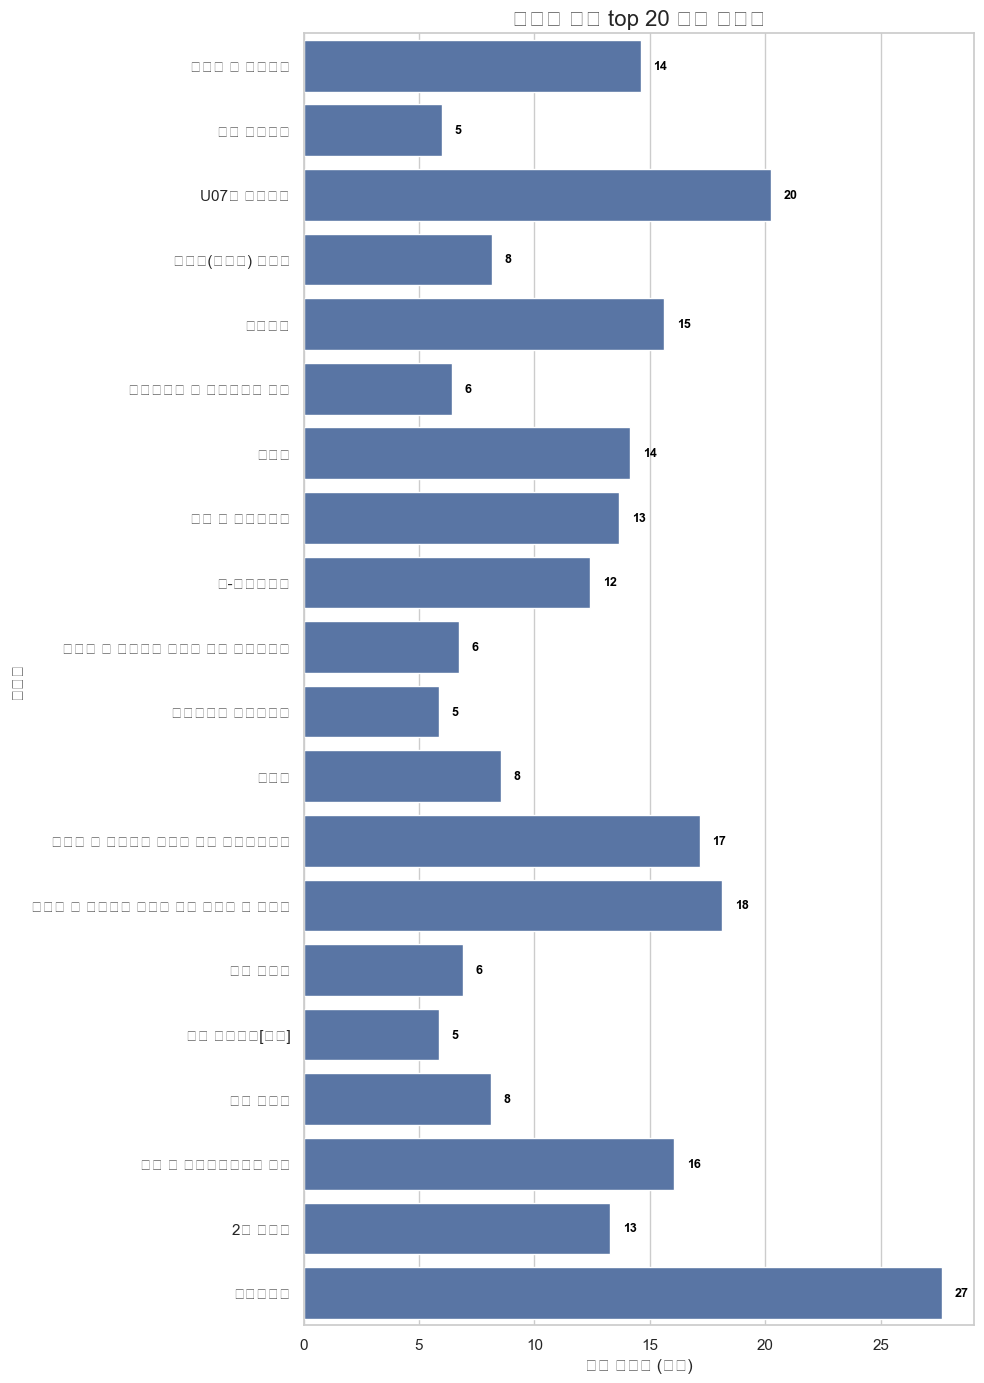

In [51]:
# 다빈도 질환 시각화
plt.figure(figsize=(10, 14))
ax = sns.barplot(y='질병명', x='평균방문당진료비', data=top_diseases)
plt.title('다빈도 질환 top 20 평균 진료비', fontsize=16)
plt.ylabel('질병명', fontsize=12)
plt.xlabel('평균 진료비 (천원)', fontsize=12)
plt.tight_layout()

# 값 레이블 표시
for i, bar in enumerate(ax.patches):
    ax.text(bar.get_width() + (top_diseases['평균방문당진료비'].max() * 0.02),  # 최대값의 2% 정도 오른쪽에 표시
            bar.get_y() + bar.get_height()/2,
            f'{int(bar.get_width()):,}',
            va='center', fontsize=9, color='black', fontweight='bold')
plt.show()


C:\Users\choiy\AppData\Local\Temp\ipykernel_12228\2088965944.py:35: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\choiy\AppData\Local\Temp\ipykernel_12228\2088965944.py:35: UserWarning: Glyph 51008 (\N{HANGUL SYLLABLE EUN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\choiy\AppData\Local\Temp\ipykernel_12228\2088965944.py:35: UserWarning: Glyph 50684 (\N{HANGUL SYLLABLE YEOM}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\choiy\AppData\Local\Temp\ipykernel_12228\2088965944.py:35: UserWarning: Glyph 48143 (\N{HANGUL SYLLABLE MIC}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\choiy\AppData\Local\Temp\ipykernel_12228\2088965944.py:35: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\choiy\AppData\Local\Temp\ipykernel_12228\2088965944.py:35: UserWarning: Glyph 51656 (\N{HANGUL SYLLABLE JIL}) missing from font(s) Arial.
  plt.tight_la

<Figure size 1200x600 with 0 Axes>

c:\Users\choiy\Desktop\Medi-Budget\backend\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\choiy\Desktop\Medi-Budget\backend\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51008 (\N{HANGUL SYLLABLE EUN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\choiy\Desktop\Medi-Budget\backend\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50684 (\N{HANGUL SYLLABLE YEOM}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\choiy\Desktop\Medi-Budget\backend\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48143 (\N{HANGUL SYLLABLE MIC}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\choiy\Desktop\Medi-Budget\backend\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51452 (

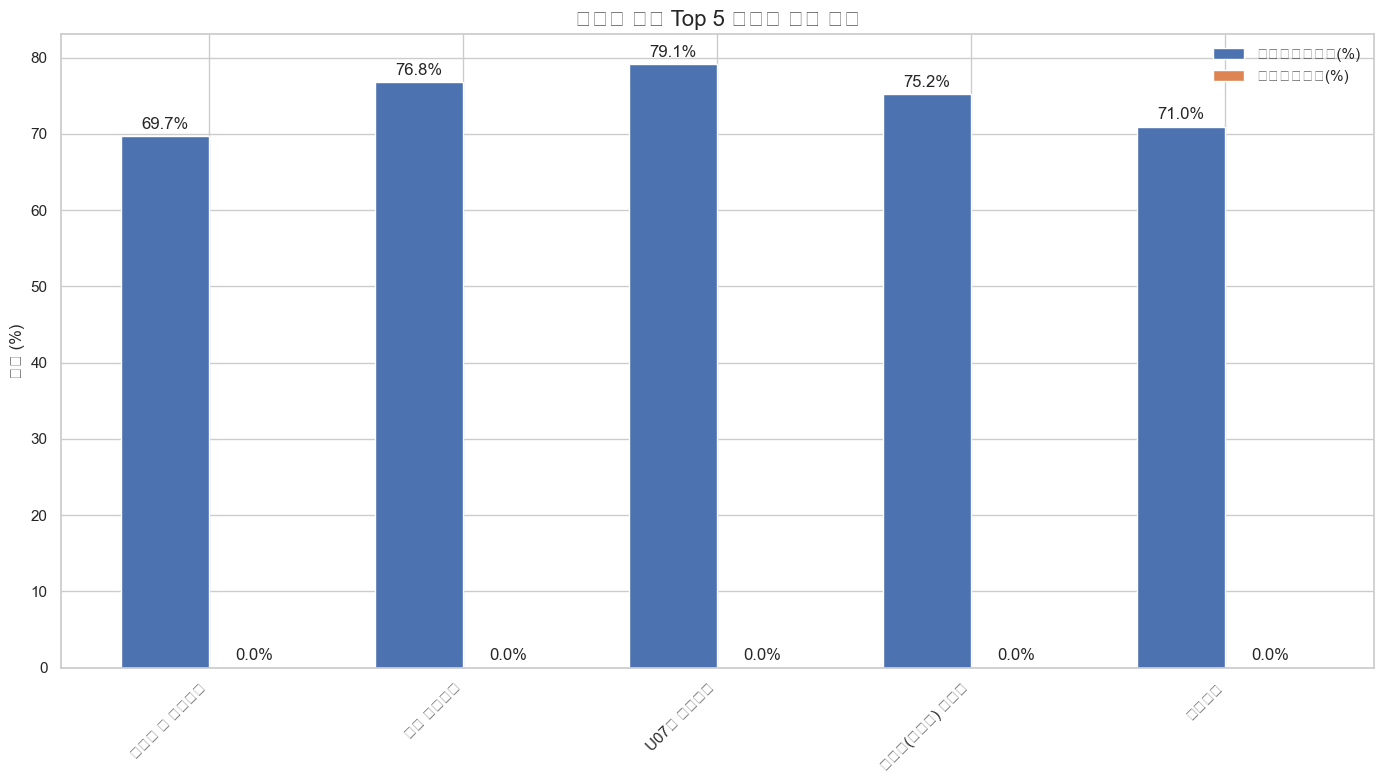

In [56]:
# 질환별 진료비 구성 비율 분석
top_diseases['보험자비율'] = top_diseases['보험자진료비'] / top_diseases['요양급여총비용'] * 100
top_diseases['환자부담비율'] = top_diseases['평균환자당진료비'] / top_diseases['요양급여총비용'] * 100

# 질환별 진료비 구성 비율 시각화
top_5_diseases = top_diseases.head()

plt.figure(figsize=(12, 6))
x = np.arange(len(top_5_diseases))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - width/2, top_5_diseases['보험자비율'], width, label='보험자부담비율(%)')
rects2 = ax.bar(x + width/2, top_5_diseases['환자부담비율'], width, label='환자부담비율(%)')

ax.set_title('다빈도 질환 Top 5 진료비 구성 비율', fontsize=16)
ax.set_ylabel('비율 (%)', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(top_5_diseases['질병명'], rotation=45, ha='right')
ax.legend()

# 값 레이블 표시
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()


In [57]:
## 7. 연령대별 진료 패턴 분석

# 연령대별 평균 진료비 추이
age_cost_avg_query = """
    SELECT 연령대, AVG(요양급여총비용) as 평균총비용, AVG(보험자비용) as 평균보험비용, 
           AVG(환자비용) as 평균환자비용, AVG(내원일수) as 평균내원일수
    FROM 연령대별_진료비_테이블
    GROUP BY 연령대
    ORDER BY 연령대
"""
age_cost_avg = pd.read_sql_query(age_cost_avg_query, engine)

print("\n연령대별 평균 진료비:")
display(age_cost_avg)

ProgrammingError: (psycopg2.errors.UndefinedTable) 오류:  "연령대별_진료비_테이블" 이름의 릴레이션(relation)이 없습니다
LINE 4:     FROM 연령대별_진료비_테이블
                 ^

[SQL: 
    SELECT 연령대, AVG(요양급여총비용) as 평균총비용, AVG(보험자비용) as 평균보험비용, 
           AVG(환자비용) as 평균환자비용, AVG(내원일수) as 평균내원일수
    FROM 연령대별_진료비_테이블
    GROUP BY 연령대
    ORDER BY 연령대
]
(Background on this error at: https://sqlalche.me/e/20/f405)

In [ ]:
# 연령대별 평균 진료비 시각화
plt.figure(figsize=(12, 6))
plt.plot(age_cost_avg['연령대'], age_cost_avg['평균총비용'], marker='o', linewidth=2, label='평균 총비용')
plt.plot(age_cost_avg['연령대'], age_cost_avg['평균보험비용'], marker='s', linewidth=2, label='평균 보험비용')
plt.plot(age_cost_avg['연령대'], age_cost_avg['평균환자비용'], marker='^', linewidth=2, label='평균 환자비용')
plt.title('연령대별 평균 진료비 추이', fontsize=16)
plt.xlabel('연령대', fontsize=12)
plt.ylabel('진료비 (원)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# 연령대별 다빈도 질환 분석
age_disease_query = """
    SELECT a.연령대, d.질병명, COUNT(*) as 빈도수
    FROM 연령대별_진료비_테이블 a
    JOIN 질병명_테이블 d ON a.질병코드 = d.질병코드
    GROUP BY a.연령대, d.질병명
    ORDER BY a.연령대, 빈도수 DESC
"""
age_disease = pd.read_sql_query(age_disease_query, engine)


In [ ]:
# 각 연령대별 상위 3개 질환 추출
top_diseases_by_age = []
for age in age_disease['연령대'].unique():
    top_3 = age_disease[age_disease['연령대'] == age].head(3)
    top_diseases_by_age.append(top_3)

top_diseases_by_age_df = pd.concat(top_diseases_by_age)

print("\n연령대별 다빈도 질환 Top 3:")
display(top_diseases_by_age_df)


In [ ]:
# 연령대별 상위 질환 시각화
pivot_age_disease = pd.pivot_table(
    age_disease, 
    values='빈도수',
    index='연령대',
    columns='질병명',
    aggfunc=np.sum,
    fill_value=0
)

# 각 연령대별 상위 5개 질환만 선택
top_diseases_all = []
for age in pivot_age_disease.index:
    top_5 = pivot_age_disease.loc[age].nlargest(5).index.tolist()
    top_diseases_all.extend(top_5)

top_diseases_unique = list(set(top_diseases_all))
pivot_selected = pivot_age_disease[top_diseases_unique]

plt.figure(figsize=(16, 10))
sns.heatmap(pivot_selected, annot=True, cmap='YlGnBu', fmt='g')
plt.title('연령대별 다빈도 질환 분포', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
## 8. 지역별 분석

# 지역별 평균 진료비
region_cost_query = """
    SELECT r.지역명, AVG(rc.요양급여총비용) as 평균총비용, AVG(rc.보험자비용) as 평균보험비용, 
           AVG(rc.환자비용) as 평균환자비용, SUM(rc.환자수) as 총환자수
    FROM 지역별_진료비_테이블 rc
    JOIN 지역_테이블 r ON rc.지역코드 = r.지역코드
    GROUP BY r.지역명
    ORDER BY 평균총비용 DESC
"""
region_cost = pd.read_sql_query(region_cost_query, engine)

print("\n지역별 평균 진료비:")
display(region_cost)

In [ ]:
# 지역별 진료비 시각화
fig, ax = plt.subplots(figsize=(14, 8))
x = np.arange(len(region_cost))
width = 0.25

rects1 = ax.bar(x - width, region_cost['평균총비용'], width, label='평균 총비용')
rects2 = ax.bar(x, region_cost['평균보험비용'], width, label='평균 보험비용')
rects3 = ax.bar(x + width, region_cost['평균환자비용'], width, label='평균 환자비용')

ax.set_title('지역별 평균 진료비', fontsize=16)
ax.set_xlabel('지역명', fontsize=12)
ax.set_ylabel('진료비 (원)', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(region_cost['지역명'], rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
# 지역별 환자수 대비 진료비 분석
region_cost['환자당비용'] = region_cost['평균총비용'] / region_cost['총환자수']
region_cost_sorted = region_cost.sort_values('환자당비용', ascending=False)

plt.figure(figsize=(14, 8))
ax = sns.barplot(x='지역명', y='환자당비용', data=region_cost_sorted)
plt.title('지역별 환자당 평균 진료비', fontsize=16)
plt.xlabel('지역명', fontsize=12)
plt.ylabel('환자당 평균 진료비 (원)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# 값 레이블 표시
for i, bar in enumerate(ax.patches):
    ax.text(bar.get_x() + bar.get_width()/2., 
            bar.get_height() + 100,
            f'{int(bar.get_height()):,}',
            ha='center', fontsize=9, rotation=0)

plt.tight_layout()
plt.show()


In [ ]:
## 9. 의료기관 종별 분석

# 의료기관 종별 평균 진료비
hospital_cost_query = """
    SELECT h.의료기관종별, AVG(hc.요양급여총비용) as 평균총비용, AVG(hc.보험자비용) as 평균보험비용, 
           AVG(hc.환자비용) as 평균환자비용, AVG(hc.내원일수) as 평균내원일수, SUM(hc.환자수) as 총환자수
    FROM 의료기관_종별_진료비_테이블 hc
    JOIN 의료기관_종별_테이블 h ON hc.의료기관코드 = h.의료기관코드
    GROUP BY h.의료기관종별
    ORDER BY 평균총비용 DESC
"""
hospital_cost = pd.read_sql_query(hospital_cost_query, engine)

print("\n의료기관 종별 평균 진료비:")
display(hospital_cost)

In [ ]:
# 의료기관 종별 진료비 시각화
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='의료기관종별', y='평균총비용', data=hospital_cost)
plt.title('의료기관 종별 평균 진료비', fontsize=16)
plt.xlabel('의료기관 종별', fontsize=12)
plt.ylabel('평균 진료비 (원)', fontsize=12)

# 값 레이블 표시
for i, bar in enumerate(ax.patches):
    ax.text(bar.get_x() + bar.get_width()/2., 
            bar.get_height() + 5000,
            f'{int(bar.get_height()):,}',
            ha='center', fontsize=10, rotation=0)

plt.tight_layout()
plt.show()


In [ ]:
# 의료기관 종별 환자당 비용 및 내원일당 비용 분석
hospital_cost['환자당비용'] = hospital_cost['평균총비용'] / hospital_cost['총환자수']
hospital_cost['내원일당비용'] = hospital_cost['평균총비용'] / hospital_cost['평균내원일수']


In [ ]:
# 환자당 비용 및 내원일당 비용 시각화
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.barplot(x='의료기관종별', y='환자당비용', data=hospital_cost, ax=ax[0])
ax[0].set_title('의료기관 종별 환자당 평균 비용', fontsize=14)
ax[0].set_xlabel('의료기관 종별', fontsize=12)
ax[0].set_ylabel('환자당 비용 (원)', fontsize=12)
ax[0].tick_params(axis='x', rotation=45)

sns.barplot(x='의료기관종별', y='내원일당비용', data=hospital_cost, ax=ax[1])
ax[1].set_title('의료기관 종별 내원일당 평균 비용', fontsize=14)
ax[1].set_xlabel('의료기관 종별', fontsize=12)
ax[1].set_ylabel('내원일당 비용 (원)', fontsize=12)
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [58]:
## 10. 상관관계 분석

# 변수 간 상관관계 분석
corr_data_query = """
    SELECT 요양급여총비용, 보험자비용, 환자비용, 내원일수, 환자수
    FROM 원본_테이블
"""
corr_data = pd.read_sql_query(corr_data_query, engine)

# 상관관계 계산
corr_matrix = corr_data.corr()

print("\n변수 간 상관관계:")
display(corr_matrix)

ProgrammingError: (psycopg2.errors.UndefinedTable) 오류:  "원본_테이블" 이름의 릴레이션(relation)이 없습니다
LINE 3:     FROM 원본_테이블
                 ^

[SQL: 
    SELECT 요양급여총비용, 보험자비용, 환자비용, 내원일수, 환자수
    FROM 원본_테이블
]
(Background on this error at: https://sqlalche.me/e/20/f405)

In [ ]:
# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, fmt='.3f')
plt.title('변수 간 상관관계 히트맵', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
## 11. 내원일수 분석

# 질환별 평균 내원일수
disease_visits_query = """
    SELECT d.질병명, AVG(o.내원일수) as 평균내원일수, AVG(o.요양급여총비용) as 평균총비용
    FROM 원본_테이블 o
    JOIN 질병명_테이블 d ON o.질병코드 = d.질병코드
    GROUP BY d.질병명
    ORDER BY 평균내원일수 DESC
    LIMIT 15
"""
disease_visits = pd.read_sql_query(disease_visits_query, engine)

print("\n평균 내원일수 상위 15개 질환:")
display(disease_visits)

In [ ]:
# 평균 내원일수와 평균 총비용 간의 관계
plt.figure(figsize=(12, 8))
scatter = plt.scatter(disease_visits['평균내원일수'], disease_visits['평균총비용'], 
                     s=100, c=range(len(disease_visits)), cmap='viridis', alpha=0.7)

# 주요 질환에 레이블 표시
for i, txt in enumerate(disease_visits['질병명']):
    plt.annotate(txt, (disease_visits['평균내원일수'].iloc[i], disease_visits['평균총비용'].iloc[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.title('질환별 평균 내원일수와 평균 총비용의 관계', fontsize=16)
plt.xlabel('평균 내원일수', fontsize=12)
plt.ylabel('평균 총비용 (원)', fontsize=12)
plt.colorbar(scatter, label='순위')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
## 12. 환자 비용 부담률 분석

# 질환별 환자 부담률
patient_burden_query = """
    SELECT d.질병명, 
           AVG(o.환자비용) as 평균환자비용, 
           AVG(o.요양급여총비용) as 평균총비용,
           (AVG(o.환자비용) / AVG(o.요양급여총비용)) * 100 as 환자부담률
    FROM 원본_테이블 o
    JOIN 질병명_테이블 d ON o.질병코드 = d.질병코드
    GROUP BY d.질병명
    ORDER BY 환자부담률 DESC
    LIMIT 15
"""
patient_burden = pd.read_sql_query(patient_burden_query, engine)

print("\n환자 부담률 상위 15개 질환:")
display(patient_burden)

In [ ]:
# 환자 부담률 시각화
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='질병명', y='환자부담률', data=patient_burden)
plt.title('질환별 환자 부담률 상위 15개', fontsize=16)
plt.xlabel('질병명', fontsize=12)
plt.ylabel('환자 부담률 (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# 값 레이블 표시
for i, bar in enumerate(ax.patches):
    ax.text(bar.get_x() + bar.get_width()/2., 
            bar.get_height() + 0.5,
            f'{bar.get_height():.1f}%',
            ha='center', fontsize=9, rotation=0)

plt.tight_layout()
plt.show()

In [ ]:
## 13. 의료비 분포 분석

# 요양급여총비용 분포 분석
plt.figure(figsize=(12, 6))
sns.histplot(corr_data['요양급여총비용'], kde=True, bins=50)
plt.title('요양급여총비용 분포', fontsize=16)
plt.xlabel('요양급여총비용 (원)', fontsize=12)
plt.ylabel('빈도', fontsize=12)
plt.axvline(corr_data['요양급여총비용'].mean(), color='r', linestyle='--', label=f'평균: {int(corr_data["요양급여총비용"].mean()):,}원')
plt.axvline(corr_data['요양급여총비용'].median(), color='g', linestyle='--', label=f'중앙값: {int(corr_data["요양급여총비용"].median()):,}원')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
## 14. EDA 결론 및 인사이트 정리
print("""
## EDA 결과 주요 인사이트

1. 다빈도 질환별 진료비 특성 파악
   - 다빈도 질환들의 평균 진료비와 환자 부담률 확인
   - 질환별 진료 특성(내원일수 등) 차이 확인

2. 연령대별 진료비 패턴 분석 결과
   - 연령에 따른 진료비 추이 및 특성 파악
   - 고령층과 유아층의 진료비 특성 비교

3. 지역별 진료비 차이 및 주요 원인 분석
   - 지역별 평균 진료비 차이 확인
   - 환자당 진료비 차이 원인 파악

4. 의료기관 종별 진료비 차이 및 특성
   - 의료기관 종별에 따른 진료비 차이 분석
   - 환자당 비용 및 내원일당 비용 차이 확인

5. 내원일수와 진료비 간의 관계
   - 내원일수가 길수록 진료비가 높아지는 경향 확인
   - 질환별 내원일수 차이 파악

6. 환자 부담률이 높은 질환 분석
   - 환자 부담률이 높은 질환 확인
   - 보험 적용 범위와의 관계 분석

7. 모델 개발을 위한 주요 예측 변수 파악
   - 진료비 예측에 중요한 변수 식별
   - 변수 간 상관관계를 통한 모델 설계 방향 설정
""")